## Building the Logisitc Regreesion model (the ML algorithm that was not covered in the course) for predicting sentiment using the preditcors and sequential data we have collected.

Pivoted to fitting a Logistic Regression, an LSTM model isn't appropriate given the data limited that we have.
Logistic Regression wasn't covered in ISA 514 & is much more appropriate for this data that we have. It also helps the buildup of our story, giving a more interpretable model fit to the data, then the we have the random forest is for pure prediction accuracy.

# Logistic Regression Workflow

Predict 'overall compound' from the dataframe with 331 observatins, using the 8 predictors.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the data
loading in the 'ModelData.csv' from the drive

In [2]:
df = pd.read_csv("ModelData.csv")

In [3]:
df.head()

,Date,Month_Num,mw_PCE,Unemployment,mw_RealDispIncome,mw_wholesale_PPI,mw_supermarket_PPI,mw_produce_CPI,mw_meat_CPI,mw_diary_CPI,Year_Month,overall compound,state,state compound,YM_dt
0,2016-01-01,1,216620.417,4.7,14121.1,90.8,193.0,302.600,NaN,NaN,2016 Jan,0.000000,Wisconsin,0.0000,2016-01-01
1,2016-02-01,2,216620.417,4.7,14135.3,91.5,191.5,304.649,NaN,NaN,2016 Feb,0.735100,Wisconsin,0.7351,2016-02-01
2,2016-03-01,3,216620.417,4.7,14135.4,92.2,191.9,299.141,NaN,NaN,2016 Mar,0.220200,Illinois,0.0000,2016-03-01
3,2016-03-01,3,216620.417,4.7,14135.4,92.2,191.9,299.141,NaN,NaN,2016 Mar,0.220200,Indiana,0.4404,2016-03-01
4,2016-04-01,4,216620.417,4.7,14106.2,91.5,193.6,296.946,NaN,NaN,2016 Apr,0.267333,Michigan,0.0000,2016-04-01


In [4]:
df.shape

(331, 15)

# Create the target and predictors datasets
The target is 'overall compound' in a classification context. Wehere positive = 1 and negative = 0

In [6]:
# creating the classification target variable from 'overall compound' (positive = 1, negative = 0)
df['target'] = np.where(df['overall compound'] >= 0, 1, 0)
df['target'].value_counts() # checking the data balance

target
1    174
0    157
Name: count, dtype: int64

Create the datafreames for X (predictors) and y (target).
- Adding the 'Date' variable to the predictors dataset becuase that will be used to impute the NA values in the dataset

In [8]:
# these are the 8 predictor names used to train the model
predictors = [
    'mw_PCE', 'Unemployment', 'mw_RealDispIncome',
    'mw_wholesale_PPI', 'mw_supermarket_PPI',
    'mw_produce_CPI', 'mw_meat_CPI', 'mw_diary_CPI']

# using date for handling missing data within the predictor dataset. but when modeling we will drop Date
X = df[predictors + ['Date']].copy()

X['Date'] = pd.to_datetime(X['Date']) # ensure 'Date' is a dateime object, this is for time-fill imputation in sequential data

Create the target df

In [10]:
y = df[['target']]

# Handle the missing data

In [11]:
# check the predictors dataset to see where the missing values are reagrding the date.
X

,mw_PCE,Unemployment,mw_RealDispIncome,mw_wholesale_PPI,mw_supermarket_PPI,mw_produce_CPI,mw_meat_CPI,mw_diary_CPI,Date
0,216620.417,4.7,14121.1,90.8,193.0,302.600,NaN,NaN,2016-01-01
1,216620.417,4.7,14135.3,91.5,191.5,304.649,NaN,NaN,2016-02-01
2,216620.417,4.7,14135.4,92.2,191.9,299.141,NaN,NaN,2016-03-01
3,216620.417,4.7,14135.4,92.2,191.9,299.141,NaN,NaN,2016-03-01
4,216620.417,4.7,14106.2,91.5,193.6,296.946,NaN,NaN,2016-04-01
...,...,...,...,...,...,...,...,...,...
326,NaN,NaN,NaN,NaN,NaN,358.172,339.37,251.443,2025-09-01
327,NaN,NaN,NaN,NaN,NaN,358.172,339.37,251.443,2025-09-01
328,NaN,NaN,NaN,NaN,NaN,358.172,339.37,251.443,2025-09-01
329,NaN,NaN,NaN,NaN,NaN,358.172,339.37,251.443,2025-09-01


In [12]:
# cheking the count of NA values for each predictor
X.isnull().sum()

mw_PCE                45
Unemployment           5
mw_RealDispIncome      5
mw_wholesale_PPI       5
mw_supermarket_PPI     5
mw_produce_CPI         0
mw_meat_CPI           33
mw_diary_CPI          33
Date                   0
dtype: int64

In [13]:
# simple mean imputation
X = X.fillna(X.mean())

X

,mw_PCE,Unemployment,mw_RealDispIncome,mw_wholesale_PPI,mw_supermarket_PPI,mw_produce_CPI,mw_meat_CPI,mw_diary_CPI,Date
0,216620.417000,4.700000,14121.100000,90.800000,193.000000,302.600,293.960346,228.541527,2016-01-01
1,216620.417000,4.700000,14135.300000,91.500000,191.500000,304.649,293.960346,228.541527,2016-02-01
2,216620.417000,4.700000,14135.400000,92.200000,191.900000,299.141,293.960346,228.541527,2016-03-01
3,216620.417000,4.700000,14135.400000,92.200000,191.900000,299.141,293.960346,228.541527,2016-03-01
4,216620.417000,4.700000,14106.200000,91.500000,193.600000,296.946,293.960346,228.541527,2016-04-01
...,...,...,...,...,...,...,...,...,...
326,269599.244895,4.439571,16666.276074,116.835049,240.231233,358.172,339.370000,251.443000,2025-09-01
327,269599.244895,4.439571,16666.276074,116.835049,240.231233,358.172,339.370000,251.443000,2025-09-01
328,269599.244895,4.439571,16666.276074,116.835049,240.231233,358.172,339.370000,251.443000,2025-09-01
329,269599.244895,4.439571,16666.276074,116.835049,240.231233,358.172,339.370000,251.443000,2025-09-01


Now, look at how many NAs there are for the predictors df.

In [14]:
# count of total NAs
X.isnull().sum()

mw_PCE                0
Unemployment          0
mw_RealDispIncome     0
mw_wholesale_PPI      0
mw_supermarket_PPI    0
mw_produce_CPI        0
mw_meat_CPI           0
mw_diary_CPI          0
Date                  0
dtype: int64

There are 0 NA values in the predictors dataframe. Lets move forward to splitting the data the fitting model.

Drop the Date column in the predictors df becuase its been used for imputaion,  its no longer needed.

In [15]:
X = X.drop(columns=['Date'])

# Split the data into Training and Test (70% train, 30% test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False) # shuffle = False keeps the order since we are working with sequential data

In [17]:
y_train

,target
0,1
1,1
2,1
3,1
4,1
...,...
226,1
227,1
228,1
229,1


In [18]:
y_train.value_counts()

target
1         117
0         114
Name: count, dtype: int64

# Scale features
It is important to scale the values of the predictors to prepare them so that the regularization penatly doesn't unfairly shrink the smaller -scaled predictors more than the ones on a large scale.
- We will use StandardScaler()

The scale of values vary for the predictors. PCE has values ~200000. Unempolyment ~4 and 5. mw_wholesale_PPI ~90-100

In [19]:
# use StandardScaler() to scale the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.41119322,  0.04723677, -1.89637433, ..., -0.69790698,
         0.51067018,  0.4370175 ],
       [-1.41119322,  0.04723677, -1.88328315, ..., -0.60195587,
         0.51067018,  0.4370175 ],
       [-1.41119322,  0.04723677, -1.88319096, ..., -0.85988595,
         0.51067018,  0.4370175 ],
       ...,
       [ 1.56118963, -0.38576698,  1.20180925, ...,  1.62308917,
         1.20355495,  1.3075167 ],
       [ 1.56118963, -0.38576698,  1.20180925, ...,  1.62308917,
         1.20355495,  1.3075167 ],
       [ 1.56118963, -0.38576698,  1.20180925, ...,  1.62308917,
         1.20355495,  1.3075167 ]])

# Fit the Logistic Regression Model using the Training Data
- using ridge regression 'l2' for variable shrinkage.

In [20]:
log_reg = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

/opt/tljh/user/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

# Make the Predictions on the test data

In [21]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]

Looking at the model coefficieints for interpretation. Giving the direction and how much they associate with sentiment

In [23]:
coef_df = pd.DataFrame({
    "Predictor": X_train.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Predictor,Coefficient
5,mw_produce_CPI,0.754610
3,mw_wholesale_PPI,0.744900
4,mw_supermarket_PPI,0.612650
1,Unemployment,0.572753
0,mw_PCE,-0.063548
7,mw_diary_CPI,-0.353425
6,mw_meat_CPI,-1.004113
2,mw_RealDispIncome,-1.741313


In [24]:
# View the model in order
print("Betas:", log_reg.coef_)

# view the intercept
print("Beta not (intercept):", log_reg.intercept_)

Betas: [[-0.06354821  0.57275301 -1.74131316  0.7449002   0.61264988  0.7546104
  -1.00411258 -0.35342463]]
Beta not (intercept): [-0.01258092]


High correlation  is a telltale sign for the reasoning model predicts all positives.
- Logistic regression assumes all variables are independent, and these variable are highly correlated, so might have to try strategies to appose the high correlation. Maybe combine the highly correlated variables (CPI, PPI, even PCE), a last-ditch strategy for model performance is to try PCA, but taht removes all interpreatbility of the model.

**Goal is to retain interpretability for the story that we can tell using this model

In [25]:
#correlation matrix
X_train.corr()

,mw_PCE,Unemployment,mw_RealDispIncome,mw_wholesale_PPI,mw_supermarket_PPI,mw_produce_CPI,mw_meat_CPI,mw_diary_CPI
mw_PCE,1.000000,-0.320996,0.638154,0.943733,0.937586,0.961592,0.669030,0.694751
Unemployment,-0.320996,1.000000,0.310085,-0.292384,-0.199388,-0.278609,-0.206286,-0.269797
mw_RealDispIncome,0.638154,0.310085,1.000000,0.571826,0.619325,0.568582,0.193286,0.201459
mw_wholesale_PPI,0.943733,-0.292384,0.571826,1.000000,0.968136,0.976168,0.707611,0.751343
mw_supermarket_PPI,0.937586,-0.199388,0.619325,0.968136,1.000000,0.966143,0.703947,0.761944
mw_produce_CPI,0.961592,-0.278609,0.568582,0.976168,0.966143,1.000000,0.771866,0.803349
mw_meat_CPI,0.669030,-0.206286,0.193286,0.707611,0.703947,0.771866,1.000000,0.958932
mw_diary_CPI,0.694751,-0.269797,0.201459,0.751343,0.761944,0.803349,0.958932,1.000000


# Evaluate the Model
Metrics to evaluate the model

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.73
Confusion Matrix:
 [[30 13]
 [14 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        43
           1       0.77      0.75      0.76        57

    accuracy                           0.73       100
   macro avg       0.72      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100

ROC AUC: 0.6923704610363117


# ROC Curve

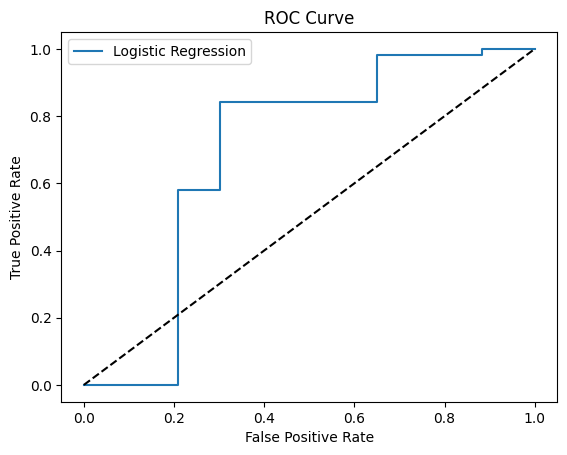

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Interpreting Coefficients

In [30]:
coef_df = pd.DataFrame({
    "Predictor": predictors,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

            Predictor  Coefficient
5      mw_produce_CPI     0.754610
3    mw_wholesale_PPI     0.744900
4  mw_supermarket_PPI     0.612650
1        Unemployment     0.572753
0              mw_PCE    -0.063548
7        mw_diary_CPI    -0.353425
6         mw_meat_CPI    -1.004113
2   mw_RealDispIncome    -1.741313


# Put the model metrics into a nice format appropriate to include in a presentation

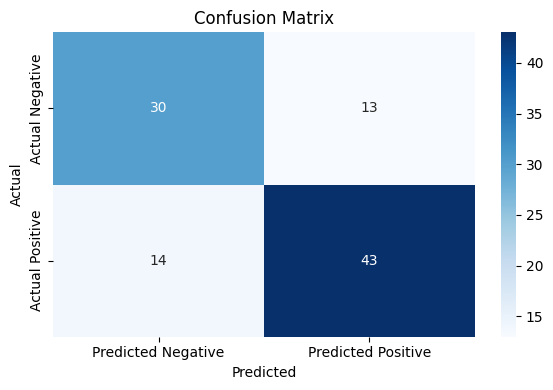

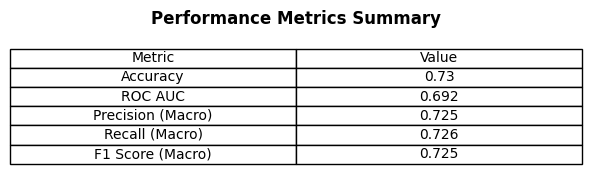

In [70]:
## same as above but can save the confusion matrix and table separately 

# --- Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# Save confusion matrix before showing
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Metrics Table ---
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Performance Metrics Summary', fontweight='bold')
plt.tight_layout()

# Save metrics table before showing
fig.savefig("metrics_summary.png", dpi=300, bbox_inches="tight")
plt.show()

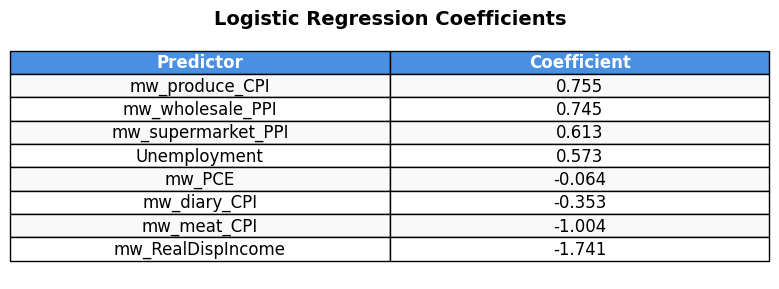

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume coef_df is already created
coef_df_rounded = coef_df.copy()
coef_df_rounded["Coefficient"] = coef_df_rounded["Coefficient"].round(3)

# Create figure
fig, ax = plt.subplots(figsize=(7, len(coef_df_rounded)*0.4))
ax.axis('tight')
ax.axis('off')

# Build table
table = ax.table(cellText=coef_df_rounded.values,
                 colLabels=coef_df_rounded.columns,
                 cellLoc='center',
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 1.4)

# Add alternating row colors for readability
for i in range(len(coef_df_rounded)):
    for j in range(len(coef_df_rounded.columns)):
        cell = table[(i+1, j)]
        if i % 2 == 0:
            cell.set_facecolor("#f9f9f9")  # light gray
        else:
            cell.set_facecolor("#ffffff")  # white

# Bold header row
for j in range(len(coef_df_rounded.columns)):
    table[(0, j)].set_facecolor("#4a90e2")   # blue header
    table[(0, j)].set_text_props(weight='bold', color='white')

plt.title("Logistic Regression Coefficients", fontweight='bold', fontsize=14)
plt.show()

fig.savefig("logistic_regression_coefficients.png", dpi=300, bbox_inches="tight")